In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke_df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [5]:
stroke_df[stroke_df['gender']== "Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [6]:
stroke_df[stroke_df['bmi'].isnull() & stroke_df["stroke"] == 1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,69160,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,1845,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,37937,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,18587,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,15102,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


In [31]:
stroke_df[stroke_df['bmi'].isnull() & stroke_df["stroke"] == 1].count()

id                   40
gender               40
age                  40
hypertension         40
heart_disease        40
ever_married         40
work_type            40
Residence_type       40
avg_glucose_level    40
bmi                   0
smoking_status       40
stroke               40
dtype: int64

In [11]:
just_stroke = stroke_df[stroke_df["stroke"] == 1]
just_stroke[just_stroke["age"]<25]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1


In [12]:
just_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,209.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,6.329452,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,26.400000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,29.700000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [13]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [14]:
# Create bins and bin labels for the Age column

age_bins = [25, 35, 45, 55, 65, 75, 85]
age_labels = ["25s", "35s", "45s", "55s", "65s", "75s"]

# Bin the age column
# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins

pd.cut(just_stroke["age"], age_bins, labels=age_labels)

0      65s
1      55s
2      75s
3      45s
4      75s
      ... 
244    55s
245    NaN
246    65s
247    65s
248    75s
Name: age, Length: 249, dtype: category
Categories (6, object): ['25s' < '35s' < '45s' < '55s' < '65s' < '75s']

In [18]:
just_stroke['age_groups'] = pd.cut(just_stroke["age"], age_bins, labels=age_labels)
just_stroke.head()

<ipython-input-18-32593d098072>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_stroke['age_groups'] = pd.cut(just_stroke["age"], age_bins, labels=age_labels)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age groups,age_groups
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,65s,65s
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,55s,55s
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,75s,75s
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,45s,45s
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,75s,75s


In [29]:
just_stroke['age_groups'].value_counts()

75s    96
65s    60
55s    54
45s    26
35s    10
25s     1
Name: age_groups, dtype: int64

In [19]:
stroke_no_null = just_stroke.dropna(axis =0)
stroke_no_null

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age groups,age_groups
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,65s,65s
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,75s,75s
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,45s,45s
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,75s,75s
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,75s,75s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,45535,Male,68.0,0,0,Yes,Private,Rural,233.94,42.4,never smoked,1,65s,65s
243,40460,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1,65s,65s
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1,55s,55s
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1,65s,65s


In [21]:
twentys_bmi= stroke_no_null[stroke_no_null['age_groups'] == "25s"]['bmi'].mean() 
twentys_bmi

29.9

In [22]:
thirtys_bmi= stroke_no_null[stroke_no_null['age_groups'] == "35s"]['bmi'].mean() 
thirtys_bmi

34.06666666666667

In [23]:
fourtys_bmi= stroke_no_null[stroke_no_null['age_groups'] == "45s"]['bmi'].mean() 
fourtys_bmi

32.236

In [24]:
fiftys_bmi= stroke_no_null[stroke_no_null['age_groups'] == "55s"]['bmi'].mean() 
fiftys_bmi

33.17142857142857

In [25]:
sixtys_bmi= stroke_no_null[stroke_no_null['age_groups'] == "65s"]['bmi'].mean() 
sixtys_bmi

30.798039215686277

In [26]:
seventys_bmi= stroke_no_null[stroke_no_null['age_groups'] == "75s"]['bmi'].mean() 
seventys_bmi

27.891250000000003

In [28]:
just_stroke[just_stroke['age_groups']=="25s"]['bmi'].fillna(twentys_bmi)

182    29.9
Name: bmi, dtype: float64

In [5]:
stroke_df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [6]:
stroke_df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [7]:
stroke_df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [8]:
stroke_df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
stroke_df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [10]:
stroke_df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:>

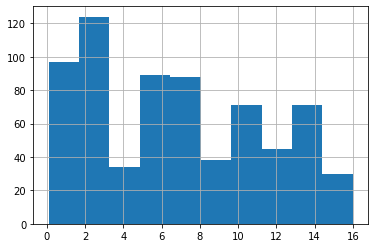

In [11]:
stroke_df[stroke_df['work_type']=='children']['age'].hist()

<AxesSubplot:>

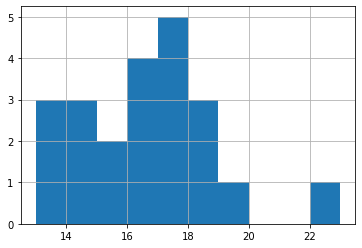

In [12]:
stroke_df[stroke_df['work_type']=='Never_worked']['age'].hist()

<AxesSubplot:>

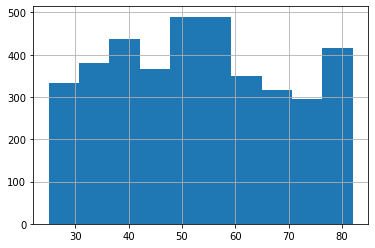

In [13]:
stroke_df[stroke_df['age']>=25]['age'].hist()

In [14]:
stroke_df[stroke_df['age']>=25].count()

id                   3874
gender               3874
age                  3874
hypertension         3874
heart_disease        3874
ever_married         3874
work_type            3874
Residence_type       3874
avg_glucose_level    3874
bmi                  3700
smoking_status       3874
stroke               3874
dtype: int64

In [15]:
stroke_df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [16]:
stroke_df[stroke_df['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [17]:
stroke_df = stroke_df.drop(3116, axis=0)

In [18]:
stroke_df = stroke_df[stroke_df['bmi'].notnull()]
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   object 
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   object 
 6   work_type          4908 non-null   object 
 7   Residence_type     4908 non-null   object 
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   object 
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.5+ KB


In [19]:
gender_labels = LabelEncoder()
smokingstatus_labels = LabelEncoder()
ever_married_labels = LabelEncoder()
worktype_labels = LabelEncoder()
residencetype_labes = LabelEncoder()

stroke_df['gender'] = gender_labels.fit_transform(stroke_df['gender'].values)
stroke_df['smoking_status'] = smokingstatus_labels.fit_transform(stroke_df['smoking_status'].values)
stroke_df['ever_married'] = ever_married_labels.fit_transform(stroke_df['ever_married'].values)
stroke_df['work_type'] = worktype_labels.fit_transform(stroke_df['work_type'].values)
stroke_df['Residence_type'] = residencetype_labes.fit_transform(stroke_df['Residence_type'].values)

stroke_df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.8,2,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.2,0,1
10,12109,0,81.0,1,0,1,2,0,80.43,29.7,2,1
11,12095,0,61.0,0,1,1,0,0,120.46,36.8,3,1


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

X = stroke_df.drop(['id', 'stroke'], axis=1)
y = stroke_df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.5, stratify=y, random_state=42)

In [21]:
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.9563977180114099

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2350
           1       0.20      0.01      0.02       104

    accuracy                           0.96      2454
   macro avg       0.58      0.50      0.50      2454
weighted avg       0.93      0.96      0.94      2454



In [24]:
confusion_matrix(y_test, y_pred)

array([[2346,    4],
       [ 103,    1]])

In [25]:
stroke_df['stroke'].value_counts()


0    4699
1     209
Name: stroke, dtype: int64

In [26]:
stroke_df[stroke_df['bmi'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
